In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 4 :  Regression

            Regression is a technique used to model and analyze the relationships between variables and often times how they contribute and are related to producing a particular outcome together. A linear regression refers to a regression model that is completely made up of linear variables.


###  Importing the required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the dataset

In [5]:
dataset = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
print(dataset.shape)


(2075259, 7)


In [7]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [10]:
dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

### Selecting the column of Global Active Power

In [11]:
X_main=dataset['Global_active_power']
X_main

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: object

### Converting in numpy array

In [0]:
X_main=X_main.to_numpy()

In [13]:
X_main.shape

(2075259,)

### Function to convert it into time series dataset

In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x = sequence[i:end_ix+1]
		X.append(seq_x)
	return np.array(X)

### Predicting the active power by seeing past hour

In [0]:
window_size=60

In [0]:
X= split_sequence(X_main,window_size)

In [0]:
X=X.astype('str')

In [18]:
type(X[0][1])

numpy.str_

In [0]:
# mask = np.all(X ==str('?'), axis=1)
# X=X[~mask]

In [20]:
X.shape

(2075199, 61)

### Marking the missing value columns

In [21]:
mask = np.all(X !='?', axis=1)
X=X[mask]
X.shape

(2045110, 61)

### Splitting into data and labels

In [22]:
XX=X[:,:-1].astype(float)
XX.shape

(2045110, 60)

In [23]:
y=X[:,-1].astype(float)
y.shape

(2045110,)

### Metrics Calculation

**Root mean squared error (RMSE):** RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average squared differences between prediction and actual observation.

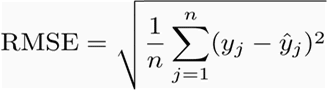

**Mean Absolute Percentage Error (MAPE)**, also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning. It usually expresses the accuracy as a ratio defined by the formula:

$M = {\frac{1}{n}}\sum _{t=1}^{n}|$($A_{t}-F_{t}$)/$A_{t}$ |


where $A_{t}$ is the actual value and $F_{t}$ is the forecast value. 

In [0]:
#Root Mean Squared Error(RMSE), Mean Absolute Percentage Error(MAPE) score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100


def print_metrics(true_labels,predicted_labels):
  # true_labels=true_labels.flatten()
  # predicted_labels=predicted_labels.flatten()
  mse=mean_squared_error(true_labels, predicted_labels)
  print('Mean Squared Error : ',mse)
  print()
  rmse = sqrt(mse)
  print('Root Mean Squared Error : ',rmse)
  print()
  mape = mean_absolute_percentage_error(true_labels, predicted_labels)
  print('Mean Absolute Percentage Error : ',mape)
  print()


# print_metrics([1,2,3],[1,2,3])



### Splitting into Train and test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.20, random_state=31)

### 1. Regression using MLP 

In [26]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=window_size))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# from sklearn import preprocessing
# mm_scaler = preprocessing.MinMaxScaler()
# X_train_minmax = mm_scaler.fit_transform(X_train)
# X_test=mm_scaler.transform(X_test)

In [0]:
# y_test=mm_scaler.transform(y_test.reshape(-1,1))

In [0]:
# X_train_minmax.shape

In [32]:
model.fit(X_train, y_train, epochs=3, verbose=0)

In [33]:
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[0.25484988]
 [2.4058537 ]
 [1.3999143 ]
 ...
 [0.77611595]
 [0.595281  ]
 [1.3059872 ]]


### Printing the r2 score

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9402245833066694

### With two hidden layers

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=window_size))
model.add(Dense(100, activation='relu', input_dim=window_size))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.fit(X_train, y_train, epochs=3, verbose=0)

In [37]:
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[0.26123196]
 [2.5038784 ]
 [1.3975797 ]
 ...
 [0.91917396]
 [0.5767523 ]
 [1.2643914 ]]


### Printing the metrics

In [38]:
r2_score(y_test, y_pred)

0.9410963032191362

In [39]:
print_metrics(y_test, y_pred)


Mean Squared Error :  0.06594920369983948

Root Mean Squared Error :  0.25680577037878155

Mean Absolute Percentage Error :  10.51245141844698



### 2. Linear Regression

### Normalizing the dataset before applying the regression

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax=mm_scaler.transform(X_test)

### Linear regression Function which I have made in the previous assignment

In [0]:
def gradient_descent(X, y, theta, iterations, a):
    past_costs = []
    past_thetas = [theta]
    theta=theta.T
    theta=theta.reshape(len(theta),1)
    y=y.reshape(len(y),1)
    print(theta.shape)
    print(y.shape)
    print(X.shape)
    m=X.shape[0]
    for i in range(iterations):
        prediction = np.dot(X, theta)
#         print(prediction[0])
        error = prediction - y
#         print(error[0])
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (a * (1/m) * np.dot(X.T, error))
#         print(theta)
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [42]:
one_array=np.ones((X_train_minmax.shape[0],1), dtype=float)
X_train_minmax =np.append(one_array,X_train_minmax,axis=1)
one_array=np.ones((X_test_minmax.shape[0],1), dtype=float)
X_test_minmax=np.append(one_array,X_test_minmax,axis=1)
print(X_train_minmax.shape)

(1636088, 61)


In [43]:
theta = [1 for i in range(X_train_minmax.shape[1])]
theta=np.array(theta)

a=0.1
past_thetas, past_costs = gradient_descent(X_train_minmax, y_train, theta, 1000, a)
theta = past_thetas[-1]


(61, 1)
(1636088, 1)
(1636088, 61)


### Printing the metrics

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Squared Error train:', mean_squared_error(y_train,X_train_minmax.dot(theta)))
print('r2 score :', r2_score(y_train,X_train_minmax.dot(theta)))
print('Mean Squared Error test:', mean_squared_error(y_test,X_test_minmax.dot(theta)))
print('r2 score :', r2_score(y_test,X_test_minmax.dot(theta)))

Mean Squared Error train: 0.14502307514471166
r2 score : 0.8697702011908934
Mean Squared Error test: 0.14634419045662958
r2 score : 0.8692901000058736


In [45]:
theta = [1 for i in range(X_train_minmax.shape[1])]
theta=np.array(theta)

a=0.01
past_thetas, past_costs = gradient_descent(X_train_minmax, y_train, theta, 2000, a)
theta = past_thetas[-1]

(61, 1)
(1636088, 1)
(1636088, 61)


In [46]:
print('Mean Squared Error train:', mean_squared_error(y_train,X_train_minmax.dot(theta)))
print('r2 score :', r2_score(y_train,X_train_minmax.dot(theta)))
print('Mean Squared Error test:', mean_squared_error(y_test,X_test_minmax.dot(theta)))
print('r2 score :', r2_score(y_test,X_test_minmax.dot(theta)))

Mean Squared Error train: 0.24793399754799994
r2 score : 0.7773568476161845
Mean Squared Error test: 0.24986001937484112
r2 score : 0.7768331080098816


###  $\alpha$ =0.1 and iterations = 5000

In [47]:
theta = [1 for i in range(X_train_minmax.shape[1])]
theta=np.array(theta)

a=0.1
past_thetas, past_costs = gradient_descent(X_train_minmax, y_train, theta, 5000, a)
theta = past_thetas[-1]

(61, 1)
(1636088, 1)
(1636088, 61)


In [48]:
print('Mean Squared Error train:', mean_squared_error(y_train,X_train_minmax.dot(theta)))
print('r2 score :', r2_score(y_train,X_train_minmax.dot(theta)))
print('Mean Squared Error test:', mean_squared_error(y_test,X_test_minmax.dot(theta)))
print('r2 score :', r2_score(y_test,X_test_minmax.dot(theta)))

Mean Squared Error train: 0.09238646031548486
r2 score : 0.9170375464210404
Mean Squared Error test: 0.09331054075689868
r2 score : 0.91665804147964


### Verifying with sklearn Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [50]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
print('r2 score :', r2_score(y_test,pred))

r2 score : 0.9388512567232952


In [0]:

reg = LinearRegression().fit(X_train_minmax, y_train)
pred = reg.predict(X_test_minmax)

In [52]:
print('r2 score :', r2_score(y_test,pred))

r2 score : 0.9388512567232952


### For window size = 60 (1 hrs)

### Missing value predictions

In [53]:
X_main.shape

(2075259,)

In [54]:
X_main

array(['4.216', '5.360', '5.374', ..., '0.938', '0.934', '0.932'],
      dtype=object)

In [55]:
X_main=X_main.astype('str')
X_main

array(['4.216', '5.360', '5.374', ..., '0.938', '0.934', '0.932'],
      dtype='<U6')

In [56]:
X_main=X_main.reshape(-1,1)
X_main.shape

(2075259, 1)

In [57]:
mask = np.all(X_main !='?', axis=1)
# X=X[mask]
# X.shape
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [58]:
print('Number of missing entries : ',len(mask)-np.count_nonzero(mask))

Number of missing entries :  25979


In [59]:
missing_indices=np.where(~mask)
missing_indices=np.array(missing_indices).flatten()
missing_indices

array([   6839,    6840,   19724, ..., 1990187, 1990188, 2027411])

In [60]:
missing_indices.shape

(25979,)

In [61]:
X_main=X_main.reshape(-1)
X_main.shape

(2075259,)

In [62]:
pred_missing={}
for index in missing_indices:
  #print(index)
  #index=6839
  x_test=X_main[index-window_size:index]
  x_test=x_test.astype(float).reshape(1,-1)
  #print(x_test.shape)
  y_pred = model.predict(x_test, verbose=0)
  #y_pred = reg.predict(x_test)
  # print(y_pred[0][0])
  pred_missing[index]=y_pred[0][0]
  X_main[index]=y_pred[0][0]
pred_missing


{6839: 0.2797076,
 6840: 0.29261824,
 19724: 5.9437566,
 19725: 5.8198695,
 41832: 3.164722,
 61909: 2.1693318,
 98254: 3.0318892,
 98255: 3.047947,
 142588: 0.43437964,
 190497: 0.5033902,
 190498: 0.5003062,
 190499: 0.49260914,
 190500: 0.48871958,
 190501: 0.49848676,
 190502: 0.52199113,
 190503: 0.5434889,
 190504: 0.5575491,
 190505: 0.55900985,
 190506: 0.5540232,
 190507: 0.5564536,
 190508: 0.56341785,
 190509: 0.5584812,
 190510: 0.5677395,
 190511: 0.56523675,
 190512: 0.5638104,
 190513: 0.56949776,
 190514: 0.5779307,
 190515: 0.5888597,
 190516: 0.60386014,
 190517: 0.6236651,
 190518: 0.64525974,
 190519: 0.6709249,
 190520: 0.69977987,
 190521: 0.7309085,
 190522: 0.7650665,
 190523: 0.79370946,
 190524: 0.8203981,
 190525: 0.8481195,
 190526: 0.87049055,
 190527: 0.8950586,
 190528: 0.9310877,
 190529: 0.98201597,
 190530: 1.0426798,
 190531: 1.1004472,
 190532: 1.1467292,
 190533: 1.195755,
 190534: 1.2503827,
 190535: 1.3291566,
 190536: 1.4143019,
 190537: 1.497071

## Checking For window size of 2 hrs ( 120 )

In [0]:
window_size=120

In [0]:
X_main=dataset['Global_active_power']
X_main=X_main.to_numpy()
X= split_sequence(X_main,window_size)
X=X.astype('str')
mask = np.all(X !='?', axis=1)
X=X[mask]
XX=X[:,:-1].astype(float)
y=X[:,-1].astype(float)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.20, random_state=31)

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=window_size))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [67]:
model.fit(X_train, y_train, epochs=3, verbose=0)

In [68]:
y_pred = model.predict(X_test, verbose=0)
print(y_pred)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[4.1119356]
 [1.27963  ]
 [1.2897612]
 ...
 [1.4351709]
 [3.0839438]
 [4.8598633]]


0.93909322693793

In [0]:
missing_indices=np.where(~mask)
missing_indices=np.array(missing_indices).flatten()
missing_indices
X_main=X_main.reshape(-1)

In [70]:
pred_missing={}
for index in missing_indices:
  #print(index)
  #index=6839
  x_test=X_main[index-window_size:index]
  x_test=x_test.astype(float).reshape(1,-1)
  #print(x_test.shape)
  y_pred = model.predict(x_test, verbose=0)
  #y_pred = reg.predict(x_test)
  # print(y_pred[0][0])
  pred_missing[index]=y_pred[0][0]
  X_main[index]=y_pred[0][0]
pred_missing

{6719: 3.6653774,
 6720: 3.5929344,
 6721: 3.5624988,
 6722: 3.5546823,
 6723: 3.506437,
 6724: 3.4787092,
 6725: 3.4103448,
 6726: 3.2898803,
 6727: 3.2039816,
 6728: 3.144487,
 6729: 3.1283028,
 6730: 3.152235,
 6731: 3.0876136,
 6732: 3.0013669,
 6733: 3.0071251,
 6734: 2.9986205,
 6735: 2.9834774,
 6736: 2.9577956,
 6737: 2.9022157,
 6738: 2.8678348,
 6739: 2.8583348,
 6740: 2.8322008,
 6741: 2.7894692,
 6742: 2.7542152,
 6743: 2.732966,
 6744: 2.6899364,
 6745: 2.654047,
 6746: 2.6418414,
 6747: 2.6251926,
 6748: 2.5751433,
 6749: 2.5552967,
 6750: 2.553972,
 6751: 2.544481,
 6752: 2.528464,
 6753: 2.530978,
 6754: 2.5474906,
 6755: 2.5418496,
 6756: 2.535755,
 6757: 2.5215805,
 6758: 2.4761598,
 6759: 2.4183214,
 6760: 2.3827248,
 6761: 2.3325741,
 6762: 2.2259924,
 6763: 2.132712,
 6764: 2.0534537,
 6765: 1.9683708,
 6766: 1.9019192,
 6767: 1.8291955,
 6768: 1.7579236,
 6769: 1.6907909,
 6770: 1.6250266,
 6771: 1.5661695,
 6772: 1.5419744,
 6773: 1.5434753,
 6774: 1.5499152,
 67